# **Project Overview**
Maven Telecom is a telecommunication company that provides phone and internet servies to 7,043 customers in California. Data from Q2 suggests that customer churn has become a serious concern, in this analysis, with the available data about customer demographucs, location, services and current status, our purpose is to identify:
1. The importance of churn customers on company's performance in general and total revenue and monthly charge in particular
2. Factors can be the key drivers of customer churn
3. Churn reasons

This analysis will be used to suggest some approaches to reduce the customer churn rate.

## **1. The importance of churn customers on company's performace**

We will be looking at churn by revenue. Even though there are more than one KPIs when it comes to revenue: Total lifetime revenue, monthly charge, and average monthy revenue, we will use total revenue to evaluate the value of customers. The customers who churned contributed about 17% of the total revenue of company, which is significant. 

In [50]:
#import all necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preparation dataset, understand dataset
#Upload dataset
tele = pd.read_csv('telecom_customer_churn.csv')
#encode categorical answers
service_anw = {'Yes' : 1, 'No':0,'Cable':0, 'Fiber Optic' :1, 'DSL': 2}
contract = {'Month-to-Month' : 0, 'One Year': 1, 'Two Year':2}
customer_status = {'Stayed' : 0, 'Churned':1, 'Joined': 2}
payment_method = {'Credit Card': 0,  'Bank Withdrawal':1, 'Mailed Check':2}
#Create list of services that company provided
service = ['Phone Service', 'Multiple Lines', 'Internet Service', 
           'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
           'Unlimited Data']
#Create a copy datast and replace encoded categorical answers into the real dataset
service_change = tele.copy()
for i in range(len(service)):
  service_change[service[i]].replace(service_anw, inplace=True)

service_change['Customer Status'].replace(customer_status, inplace=True)
service_change['Contract'].replace(contract, inplace=True)
service_change['Payment Method'].replace(payment_method, inplace = True)

churn = tele.groupby(['Customer Status'])['Total Revenue'].sum().reset_index()
churn['Revenue Percentage'] = churn['Total Revenue'].apply(lambda x: (x/(churn['Total Revenue'].sum())*100).round(1))
churn


,Customer Status,Total Revenue,Revenue Percentage
0,Churned,3684459.82,17.2
1,Joined,54279.75,0.3
2,Stayed,17632392.12,82.5


## **2. Factors can be the key drivers of customer churn**

### 2.1 Services that company provided. 


Each customer has different customer profile in terms of services that he/she subscribes. Telecom is currently offering 12 serivices. They are: Phone service, Multiple Lines, Internet Service, Internet Type, Online Security, online Backup, Decive Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data.

From the first analysis of datasets, online security, online back up, device protection and premium tech support have correlated relationship with customer status. To be more precise, customers who don't subscribe to these services tend to stop using company's services after a period of time. Although other services seem to have relationship with customer status, however, it is weak and may not be considered factors affecting churning decision of customers. 



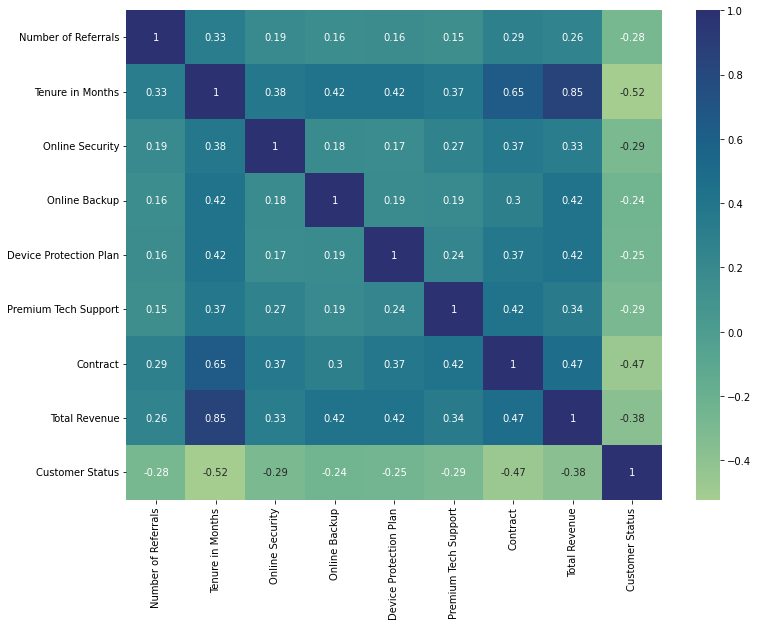

In [51]:
#Create correlation table of factors affecting inclduing services and other features
cols = ['Number of Referrals', 'Tenure in Months', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Contract', 'Total Revenue', 'Customer Status']
subset = service_change[cols].corr()
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(subset, annot=True, cmap='crest')


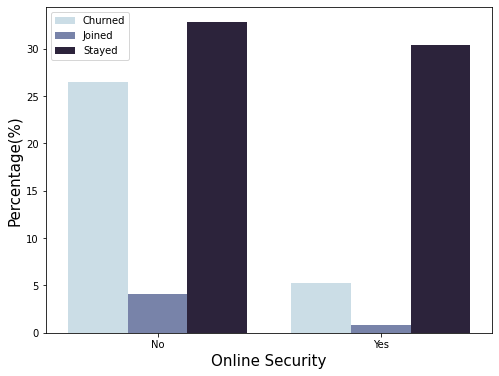

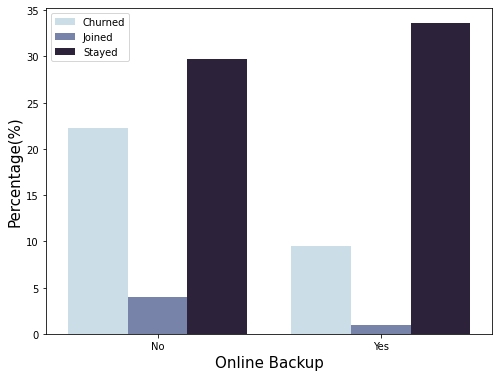

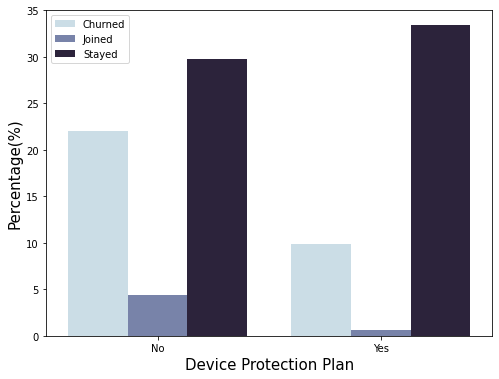

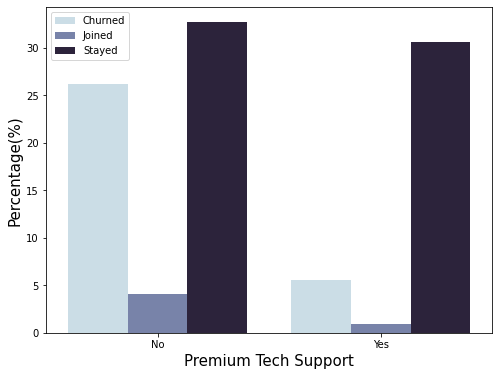

In [20]:
service = ['Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support']
for i in range(len(service)):
  ser = tele.groupby(['Customer Status',service[i]]).agg(Number_of_Customers = (service[i], 'count')).reset_index()
  ser['Number_of_Customer_percentage'] = ser['Number_of_Customers'].apply(lambda x: (x/(ser['Number_of_Customers'].sum())*100).round(1))
  fig, ax = plt.subplots(figsize = (8,6))
  sns.barplot(data=ser, x= service[i], y = 'Number_of_Customer_percentage',hue = 'Customer Status', palette = 'ch:s=.25,rot=-.25')
  plt.xticks(rotation = 0, fontsize=10)
  plt.ylabel(ylabel= 'Percentage(%)', fontsize = 15)
  plt.xlabel(xlabel = service[i], fontsize =15)
  plt.legend(loc = 'upper left')
  plt.show()

### 2.2 Customer's other features
Contracts, number of referrals and tenure of months seem like another three features to look into to find the common characteristics of churned customers. 
Customers who have the long contract with company will usually choose to stay with company. It is difficult for them to stop using services because of long commitment that they have made earlier. On the other hand, customers who have month-to-month contract are easier to churn away when there are more attractive offers from Telecom's competitors. 

The relationship between number of refferals and customer status is the same. Customers having more refarrals don't choose to leave the company. There are some reasons behind it. Maybe it is because their family, friend network is using company's services, they receive special promotion and discounts for specific discount or getting special offer when connecting to peole within the same network. Whereas, customers who don't have or have less referrals tend to leave the company. Similarly, the longer the customers using Telecom's service, the harder it is for them to churn the company away. The reason behind this is there is no commitment between them and company. The relationship between these customers and company is so weak that it is easy for competitors to break into. 


Overall, the commitment of customers to company is one of the most important factors that influence the final decision of churning. This commitment is built upon different things: service quality, customer service and customer experience. With this in mind, there are some recommendations to build this commitment and reduce churn rate later in this report. 

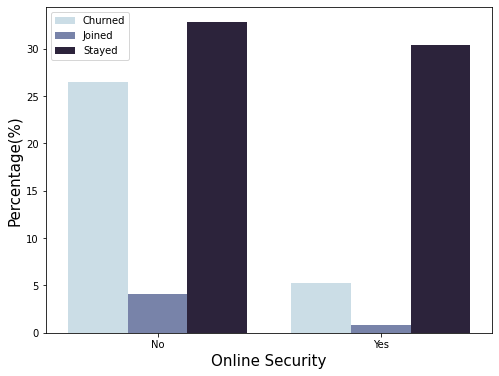

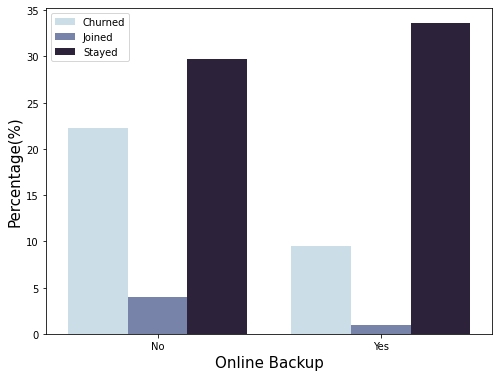

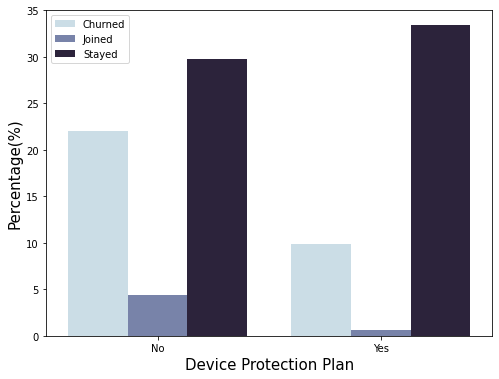

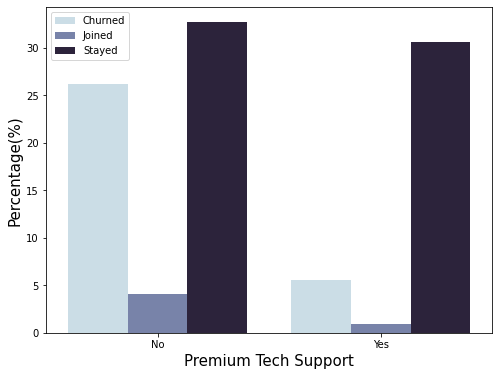

In [21]:
feature = ['Number of Referrals', 'Tenure in Months', 'Contract']
for i in range(len(service)):
  ser = tele.groupby(['Customer Status',service[i]]).agg(Number_of_Customers = (service[i], 'count')).reset_index()
  ser['Number_of_Customer_percentage'] = ser['Number_of_Customers'].apply(lambda x: (x/(ser['Number_of_Customers'].sum())*100).round(1))
  fig, ax = plt.subplots(figsize = (8,6))
  sns.barplot(data=ser, x= service[i], y = 'Number_of_Customer_percentage',hue = 'Customer Status', palette = 'ch:s=.25,rot=-.25')
  plt.xticks(rotation = 0, fontsize=10)
  plt.ylabel(ylabel= 'Percentage(%)', fontsize = 15)
  plt.xlabel(xlabel = service[i], fontsize =15)
  plt.legend(loc = 'upper left')
  plt.show()

## **3. Churn reasons**
The reasons customers choose to stop using company's service vary, however they comes to three main categories: competitors, dissatisfaction and attitude. 

Despite of the fact that customers who churn away because of competitors take a large percentage of churned customers, the ones who churned because of attitude and dissatisfaction also contribute the large portion of churned customers. This is the red alarm for Telecom to do internal audit in training employees, customer service, products and services. 

                                                           Churn Reason
Churn Category  Churn Reason                                           
Attitude        Attitude of service provider                         94
                Attitude of support person                          220
Competitor      Competitor had better devices                       313
                Competitor made better offer                        311
                Competitor offered higher download speeds           100
                Competitor offered more data                        117
Dissatisfaction Lack of self-service on Website                      29
                Limited range of services                            37
                Network reliability                                  72
                Poor expertise of online support                     31
                Poor expertise of phone support                      12
                Product dissatisfaction                         

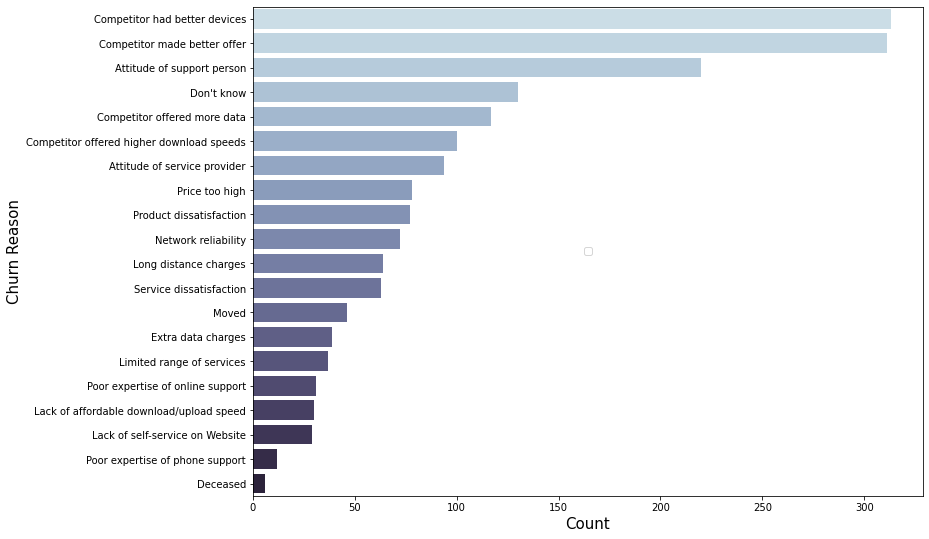

In [25]:
churn_reason = tele.groupby(['Churn Category','Churn Reason'])['Churn Reason'].count().to_frame()
print(churn_reason)

print(' ')

figsize = plt.subplots(figsize = (12,9))
sns.countplot(data = tele, y ='Churn Reason', orient = 'v', order = tele['Churn Reason'].value_counts().index, palette = 'ch:s=.25,rot=-.25')
plt.yticks(rotation = 0, fontsize=10)
plt.ylabel(ylabel= 'Churn Reason', fontsize = 15)
plt.xlabel(xlabel = 'Count', fontsize =15)
plt.legend(loc = 'center')
plt.show()


## **4. Recommendations**

We recommend to Maven Telecom the following action plans based on our analysis.

**Part 1: Improve products and services**
1. Research device offeres from competitors and expend our device offerings accordingly
2. Improve our current products and services to compete with competitors in terms of speed, reliabily...

**Part 2: Customer Service**
1. Design special training for customer service employees when communicating and answering customers' questions. 
2. Create online platform for this two sided communication and for rating level of satisfaction of customers after reaching the company out for help. 
3. Create and organize self-help content on Telecom's website.

**Part 3: Marketing and Sales**
1. Since any offer is better than no offer, experiement with offering customers Device Protection Plan and/or Premium Tech support free trials with discount should they choose to opt in
2. Convert regular customers to high value customers: use offers to incentivize customers to refer our services from others to others and get on one/two year contracts. 

The analysis of company's offers to keep customers stay and convert them to high value customers. 



In [26]:
offer = tele.groupby(['Customer Status','Offer']).agg(Number_of_Customers = ('Offer', 'count')).sort_values('Number_of_Customers').reset_index()
offer['Number_of_Customer_percentage'] = offer['Number_of_Customers'].apply(lambda x: (x/(offer['Number_of_Customers'].sum())*100).round(1))
offer

,Customer Status,Offer,Number_of_Customers,Number_of_Customer_percentage
0,Churned,Offer A,35,0.5
1,Churned,Offer C,95,1.3
2,Churned,Offer B,101,1.4
3,Churned,Offer D,161,2.3
4,Joined,Offer E,175,2.5
5,Stayed,Offer E,204,2.9
6,Joined,None,279,4.0
7,Stayed,Offer C,320,4.5
8,Churned,Offer E,426,6.0
9,Stayed,Offer D,441,6.3


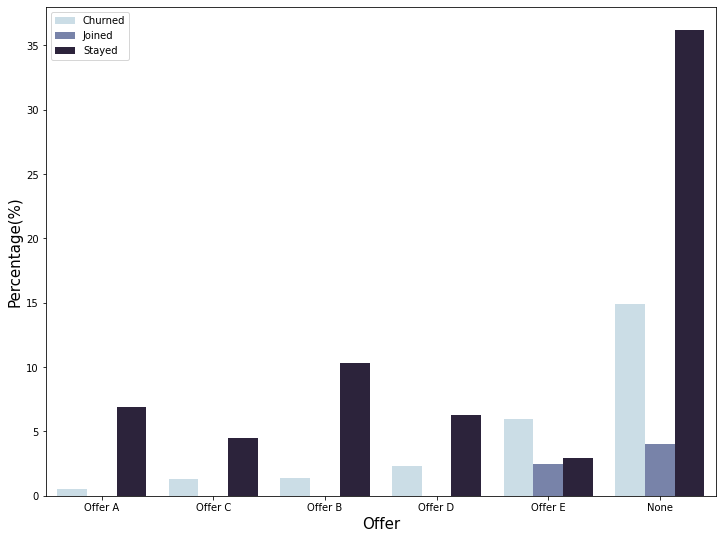

In [28]:
fig = plt.subplots(figsize = (12,9))
sns.barplot(data=offer, x= 'Offer', y = 'Number_of_Customer_percentage', hue = 'Customer Status', palette = 'ch:s=.25,rot=-.25')
plt.xticks(rotation = 0, fontsize=10)
plt.ylabel(ylabel= 'Percentage(%)', fontsize = 15)
plt.xlabel(xlabel = 'Offer', fontsize =15)
plt.legend(loc = 'upper left')
plt.show()

Offer A and B has a relatively high percentage of customers who stay with company, compared to the percentage of customers who churned. 

With this kept in mind, Telecom can provide these two options to regular customers to convert them to high value customers or have them build long term relationship with company. 

Source: [Maven Analytics](https://www.mavenanalytics.io/data-playground)